# Projeto final de Data Science da Infinity  
> aluno: Walter Alves da Silva  
>link do dataset https://www.kaggle.com/datasets/kzmontage/e-commerce-website-logs/data

## import de bibilhotecas e dados

In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [263]:
df = pd.read_csv('E-commerce_Website_Logs.csv')
df.head()

,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,2017-03-14 17:43:57.172,2533,TCP,1.10.195.126,20100,Chrome,28,Female,CA,Normal,English,261.9600,No,0.0,Credit Card
1,2017-03-14 17:43:57.172,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21,Male,AR,Normal,English,731.9400,No,0.0,Debit Card
2,2017-03-14 17:43:26.135,1525,TCP,1.115.198.107,90100,Mozilla Firefox,20,Male,PL,Normal,English,14.6200,No,0.0,Cash
3,2017-03-14 17:43:26.135,4572,TCP,1.121.152.143,100300,Mozilla Firefox,66,Female,IN,Normal,Spanish,957.5775,No,0.0,Credit Card
4,2017-03-14 18:17:09.005,3652,TCP,1.123.135.213,270200,Mozilla Firefox,53,Female,KR,Normal,Spanish,22.3680,No,0.0,Cash


## limpeza de dados

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   accessed_date     172838 non-null  object 
 1   duration_(secs)   172838 non-null  int64  
 2   network_protocol  172838 non-null  object 
 3   ip                172838 non-null  object 
 4   bytes             172838 non-null  int64  
 5   accessed_Ffom     172838 non-null  object 
 6   age               99457 non-null   object 
 7   gender            172838 non-null  object 
 8   country           172838 non-null  object 
 9   membership        172838 non-null  object 
 10  language          172838 non-null  object 
 11  sales             172838 non-null  float64
 12  returned          172838 non-null  object 
 13  returned_amount   172838 non-null  float64
 14  pay_method        172838 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 19.8+ MB


In [265]:
df.describe()

,duration_(secs),bytes,sales,returned_amount
count,172838.000000,172838.000000,172838.000000,172838.000000
mean,3248.031827,1535.206858,411.346449,74.012092
std,1010.872270,6349.555845,785.537868,364.446435
min,1500.000000,28.000000,0.000000,0.000000
25%,2371.000000,264.000000,5.230000,0.000000
50%,3246.000000,589.000000,46.920000,0.000000
75%,4124.000000,2430.000000,600.160000,0.000000
max,5000.000000,932858.000000,11199.968000,22638.480000


In [266]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   accessed_date     172838 non-null  object 
 1   duration_(secs)   172838 non-null  int64  
 2   network_protocol  172838 non-null  object 
 3   ip                172838 non-null  object 
 4   bytes             172838 non-null  int64  
 5   accessed_Ffom     172838 non-null  object 
 6   age               99457 non-null   object 
 7   gender            172838 non-null  object 
 8   country           172838 non-null  object 
 9   membership        172838 non-null  object 
 10  language          172838 non-null  object 
 11  sales             172838 non-null  float64
 12  returned          172838 non-null  object 
 13  returned_amount   172838 non-null  float64
 14  pay_method        172838 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 19.8+ MB


In [267]:
df.drop(['ip'], axis=1, inplace=True)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   accessed_date     172838 non-null  object 
 1   duration_(secs)   172838 non-null  int64  
 2   network_protocol  172838 non-null  object 
 3   bytes             172838 non-null  int64  
 4   accessed_Ffom     172838 non-null  object 
 5   age               99457 non-null   object 
 6   gender            172838 non-null  object 
 7   country           172838 non-null  object 
 8   membership        172838 non-null  object 
 9   language          172838 non-null  object 
 10  sales             172838 non-null  float64
 11  returned          172838 non-null  object 
 12  returned_amount   172838 non-null  float64
 13  pay_method        172838 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 18.5+ MB


## engenharia de caracteristicas

### removendo vendas = 0

In [269]:
df = df.drop(df[df.sales == 0].index)
df.query('sales == 0')

,accessed_date,duration_(secs),network_protocol,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method


### convertendo idade para inteiro e prenchendo faltantes

In [270]:
df['age'].unique()

array(['28', '21', '20', '66', '53', '32', '69', '60', '36', '29', '67',
       '25', '24', '65', '42', '46', '23', '27', '44', '51', '68', '43',
       '59', '54', '49', '48', '40', '41', '19', '18', '22', '61', '45',
       '64', '33', '63', '34', '47', '38', '57', '30', '52', '62', '39',
       '26', '55', '56', '35', '50', '31', '37', '58', nan], dtype=object)

In [271]:
df = df[df.age != '--']
df['age'].unique()

array(['28', '21', '20', '66', '53', '32', '69', '60', '36', '29', '67',
       '25', '24', '65', '42', '46', '23', '27', '44', '51', '68', '43',
       '59', '54', '49', '48', '40', '41', '19', '18', '22', '61', '45',
       '64', '33', '63', '34', '47', '38', '57', '30', '52', '62', '39',
       '26', '55', '56', '35', '50', '31', '37', '58', nan], dtype=object)

In [272]:
df["age"] = pd.to_numeric(df["age"])


In [273]:
df['age'] = df['age'].fillna(df['age'].median())

### ajustando protocolo

In [274]:
df['network_protocol'].unique()

array(['TCP  ', 'ICMP ', 'HTTP', 'UDP  ', 'HTTP  '], dtype=object)

In [275]:
df['network_protocol'] = df['network_protocol'].str.strip()

### convertendo data para dia do ano

In [276]:
df['accessed_date'].unique()

array(['2017-03-14 17:43:57.172', '2017-03-14 17:43:26.135',
       '2017-03-14 18:17:09.005', ..., '2017-03-16 11:42:01.298',
       '2017-03-16 12:10:17.340', '2017-03-16 15:52:58.342'], dtype=object)

In [277]:
df['accessed_date'] = pd.to_datetime(df['accessed_date'], format='ISO8601')

In [278]:
df["accessed_date"] = df['accessed_date'].apply(lambda x:x.dayofyear)
df.head()

,accessed_date,duration_(secs),network_protocol,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,73,2533,TCP,20100,Chrome,28.0,Female,CA,Normal,English,261.9600,No,0.0,Credit Card
1,73,4034,TCP,20500,Mozilla Firefox,21.0,Male,AR,Normal,English,731.9400,No,0.0,Debit Card
2,73,1525,TCP,90100,Mozilla Firefox,20.0,Male,PL,Normal,English,14.6200,No,0.0,Cash
3,73,4572,TCP,100300,Mozilla Firefox,66.0,Female,IN,Normal,Spanish,957.5775,No,0.0,Credit Card
4,73,3652,TCP,270200,Mozilla Firefox,53.0,Female,KR,Normal,Spanish,22.3680,No,0.0,Cash


### convertendo genero para binario

In [279]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [280]:
gender = {'Male':1,'Female': 0}
df.gender = [gender[item] for item in df.gender]
df.head()

,accessed_date,duration_(secs),network_protocol,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,73,2533,TCP,20100,Chrome,28.0,0,CA,Normal,English,261.9600,No,0.0,Credit Card
1,73,4034,TCP,20500,Mozilla Firefox,21.0,1,AR,Normal,English,731.9400,No,0.0,Debit Card
2,73,1525,TCP,90100,Mozilla Firefox,20.0,1,PL,Normal,English,14.6200,No,0.0,Cash
3,73,4572,TCP,100300,Mozilla Firefox,66.0,0,IN,Normal,Spanish,957.5775,No,0.0,Credit Card
4,73,3652,TCP,270200,Mozilla Firefox,53.0,0,KR,Normal,Spanish,22.3680,No,0.0,Cash


### convertendo membership para numerico

In [281]:
df['membership'].unique()

array(['Normal', 'Premium'], dtype=object)

In [282]:
membro = {'Premium': 2,'Normal':1,'Not Logged In': 0}
df.membership = [membro[item] for item in df.membership]
df.head()

,accessed_date,duration_(secs),network_protocol,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,73,2533,TCP,20100,Chrome,28.0,0,CA,1,English,261.9600,No,0.0,Credit Card
1,73,4034,TCP,20500,Mozilla Firefox,21.0,1,AR,1,English,731.9400,No,0.0,Debit Card
2,73,1525,TCP,90100,Mozilla Firefox,20.0,1,PL,1,English,14.6200,No,0.0,Cash
3,73,4572,TCP,100300,Mozilla Firefox,66.0,0,IN,1,Spanish,957.5775,No,0.0,Credit Card
4,73,3652,TCP,270200,Mozilla Firefox,53.0,0,KR,1,Spanish,22.3680,No,0.0,Cash


### convertendo returned

In [283]:
df['returned'].unique()

array(['No'], dtype=object)

In [284]:
retorno = {'Yes':1,'No': 0}
df.returned = [retorno[item] for item in df.returned]
df.sample()

,accessed_date,duration_(secs),network_protocol,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
4719,74,4590,HTTP,374,Others,62.0,1,IT,2,Chinese,947.17,0,0.0,Credit Card


In [285]:
df.sample(10)

,accessed_date,duration_(secs),network_protocol,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
80269,77,4011,TCP,515,Android App,57.0,0,CA,1,Russian,1500.400,0,0.0,Cash
71238,77,2698,ICMP,70,Android App,56.0,0,IN,2,English,32.896,0,0.0,Debit Card
76543,77,4728,TCP,702,Android App,26.0,1,JP,1,Slovak,179.200,0,0.0,Debit Card
30349,75,1874,TCP,2825,Android App,56.0,1,CA,2,English,20.920,0,0.0,Cash
20210,74,2458,TCP,46,Safari,67.0,0,NO,2,German,600.160,0,0.0,Cash
155010,80,2112,ICMP,2267,Safari,43.0,0,PE,2,English,20.920,0,0.0,Cash
169485,80,2136,TCP,639,Chrome,43.0,1,US,1,English,900.240,0,0.0,Cash
25052,75,3976,UDP,441,Android App,31.0,0,AR,2,English,40.660,0,0.0,Others
25003,75,2079,TCP,40,Others,69.0,1,GB,2,English,5.230,0,0.0,Credit Card
69899,77,1744,TCP,2267,Android App,47.0,1,AT,2,English,59.904,0,0.0,Cash


### regularizando variaveis categoricas

In [286]:
from sklearn.preprocessing import OneHotEncoder

#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df = df.drop(categorical_columns, axis=1)

df


,accessed_date,duration_(secs),bytes,age,gender,membership,sales,returned,returned_amount,network_protocol_HTTP,...,language_serbian,language_slovene,language_swahili,language_swedish,language_tegulu,language_urdu,pay_method_Cash,pay_method_Credit Card,pay_method_Debit Card,pay_method_Others
0,73.0,2533.0,20100.0,28.0,0.0,1.0,261.9600,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,73.0,4034.0,20500.0,21.0,1.0,1.0,731.9400,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,73.0,1525.0,90100.0,20.0,1.0,1.0,14.6200,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,73.0,4572.0,100300.0,66.0,0.0,1.0,957.5775,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,73.0,3652.0,270200.0,53.0,0.0,1.0,22.3680,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
131478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
131480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
131487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


usando o OneHotEncoder para separar as categorias de produtos em colunas binarias, dessa forma posso usar para treinar um modelo  
fonte: https://www.geeksforgeeks.org/ml-one-hot-encoding/

### removendo invalidos

In [287]:
df.dropna(inplace=True)

In [288]:
df

,accessed_date,duration_(secs),bytes,age,gender,membership,sales,returned,returned_amount,network_protocol_HTTP,...,language_serbian,language_slovene,language_swahili,language_swedish,language_tegulu,language_urdu,pay_method_Cash,pay_method_Credit Card,pay_method_Debit Card,pay_method_Others
0,73.0,2533.0,20100.0,28.0,0.0,1.0,261.9600,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,73.0,4034.0,20500.0,21.0,1.0,1.0,731.9400,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,73.0,1525.0,90100.0,20.0,1.0,1.0,14.6200,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,73.0,4572.0,100300.0,66.0,0.0,1.0,957.5775,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,73.0,3652.0,270200.0,53.0,0.0,1.0,22.3680,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131494,79.0,4065.0,1285.0,43.0,0.0,2.0,1800.5100,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
131495,79.0,2225.0,340.0,43.0,0.0,2.0,900.2400,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
131496,79.0,3152.0,3185.0,43.0,1.0,2.0,2400.6800,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
131497,79.0,1644.0,2267.0,43.0,0.0,2.0,179.2000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## analise exploratoria

### funçoes

In [289]:
def grafico_pizza(agrupadora: str, agrupada: str, nomes: list, titulo: str):
    """tem a função de criar um grafico pizza

    Args:
        agrupadora (str): coluna que vai ser as categorias
        agrupada (str): valores da categoria
        nomes (list): labels das categorias
        titulo (str): titulo do grafico
    """
    df_por_genero = df[[agrupadora, agrupada]]
    df_por_genero = df_por_genero.groupby(agrupadora, as_index=False).sum()

    # Extraindo as séries de categoria e valor
    categorias = df_por_genero[agrupadora].to_numpy()
    valores = df_por_genero[agrupada].to_numpy()

    # Criando o gráfico de pizza
    plt.figure(figsize=(2, 2))  # Definindo o tamanho do gráfico
    plt.pie(
        valores, labels=nomes, autopct="%1.1f%%", startangle=90
    )  # Criando o gráfico
    plt.title(titulo)  # Título do gráfico
    plt.axis("equal")  # Garantindo que o gráfico seja circular
    # Mostrando o gráfico
    plt.show()


def grafico_linha(x: str, y: str, titulo: str,nomes:list):
    """_summary_

    Args:
        x (str): eixo X
        y (str):eixo Y
        titulo (str): titulo do grafico
    """
    df_graf = df[[x, y]]
    df_graf = df_graf.groupby(x, as_index=False).sum()

    x = df_graf[x]
    y = df_graf[y]

    plt.figure(figsize=(15, 6))
    plt.plot(x, y, linestyle="-")
    plt.title(titulo)
    plt.xlabel(nomes[0])
    plt.ylabel(nomes[1])
    plt.grid(True)

    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()



### grafico dia X vendas

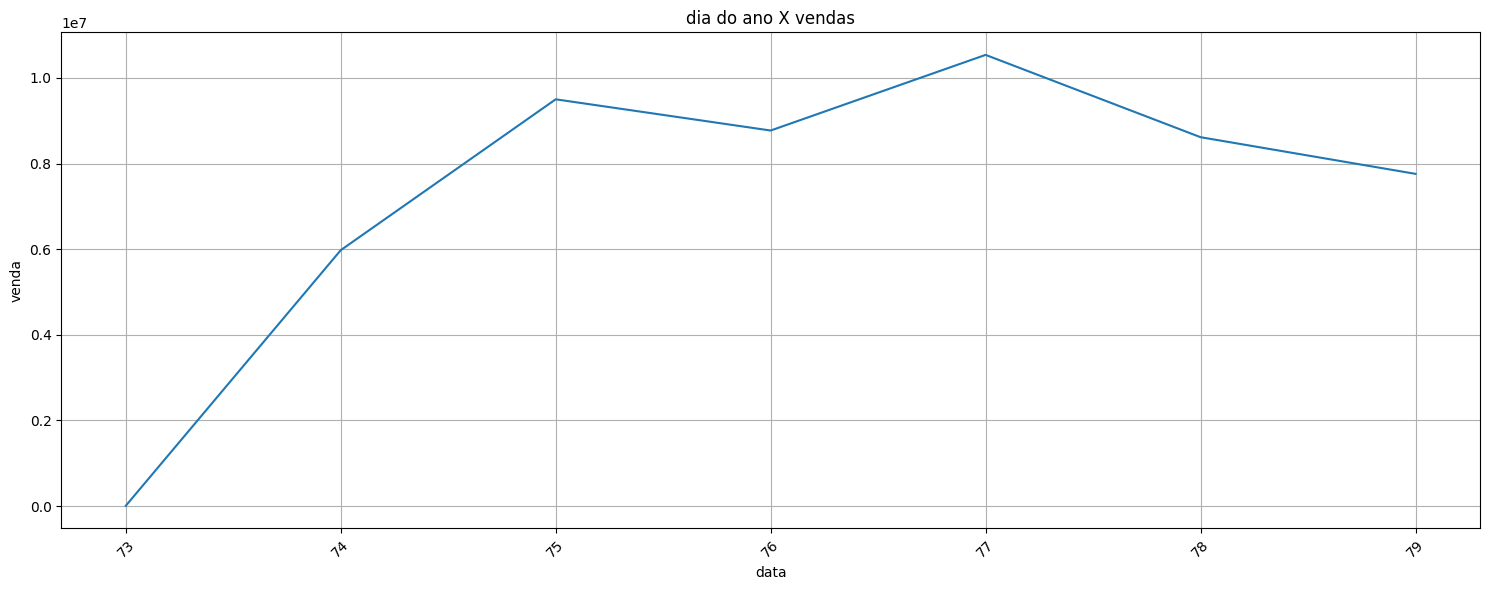

In [290]:
grafico_linha('accessed_date','sales','dia do ano X vendas',['data','venda'])

### duração X venda

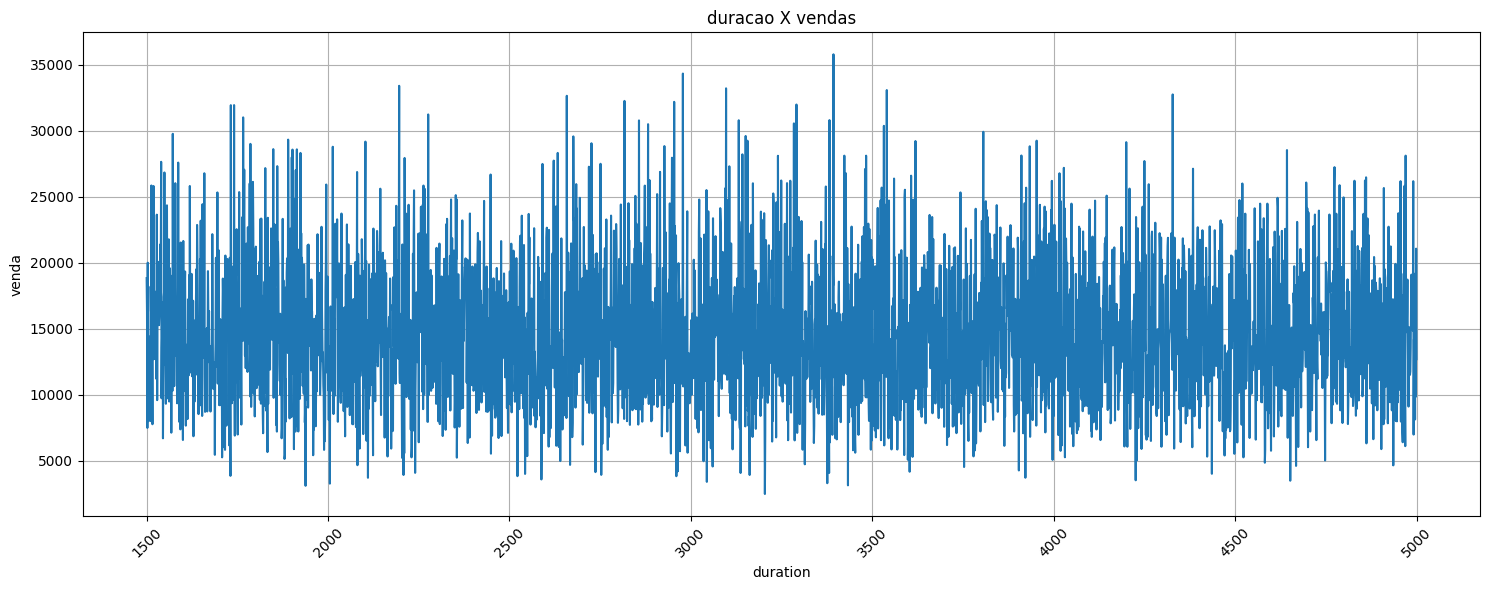

In [291]:
grafico_linha('duration_(secs)','sales','duracao X vendas',['duration','venda'])

### idade X venda

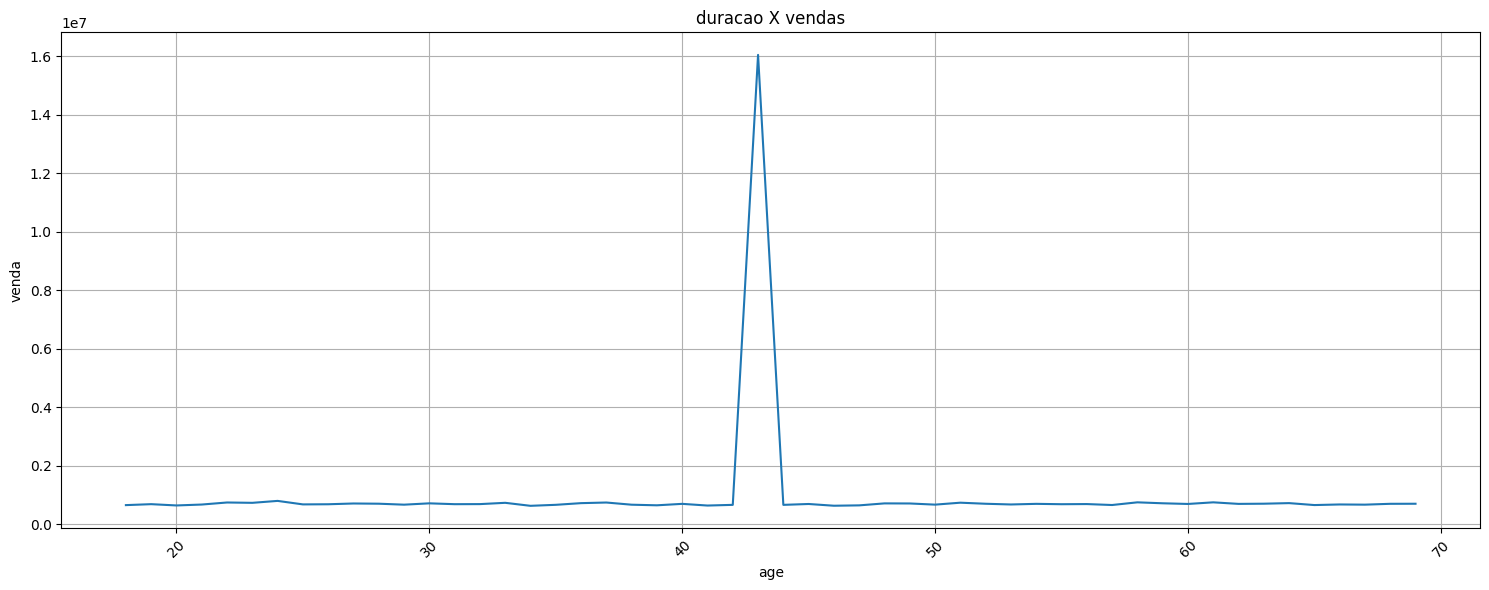

In [292]:
grafico_linha('age','sales','duracao X vendas',['age','venda'])

### genero X venda

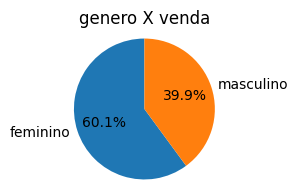

In [294]:
grafico_pizza('gender', 'sales', ['feminino','masculino'], 'genero X venda')

maior parte das vendas são de mulheres

### inscricao X vendas

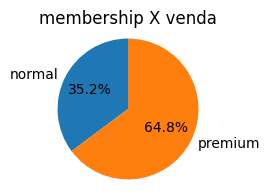

In [295]:
grafico_pizza('membership', 'sales', ['normal','premium'], 'membership X venda')

In [296]:
df_por_data = df[
    [
        "membership",
        "sales",
        "duration_(secs)",
        "bytes",
    ]
]
df_por_data = df_por_data.groupby("membership", as_index=False).sum()
df_por_data

,membership,sales,duration_(secs),bytes
0,1.0,1.800933e+07,110262784.0,30717432.0
1,2.0,3.315144e+07,207982853.0,117575157.0
